<a href="https://colab.research.google.com/github/Orliluq/Vision-Transformers-Segment-Anything/blob/main/DETR_(DEtection_TRansformer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install --upgrade --force-reinstall torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0
!pip uninstall numpy -y
!pip install numpy==1.26.4

  Using cached torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached torchaudio-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (5.7 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64

Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.7.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy

In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [2]:
import torch
from PIL import Image
from torchvision import transforms

# Cargar modelo DETR usando PyTorch Hub
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True).eval()

# Preprocess image (assuming "auto.jpg" exists)
img = Image.open("auto.jpg")
transform = transforms.Compose([
    transforms.Resize(800),
    transforms.ToTensor(),
])
tensor = transform(img).unsqueeze(0)

# Perform inference
with torch.no_grad():
    outputs = model(tensor)

# Display results (you'll likely want to process these outputs further for bounding boxes and labels)
print(outputs)

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'pred_logits': tensor([[[-14.3117,   0.0383,  -5.7505,  ...,  -4.1678,   0.0433,   7.3202],
         [-17.3877,  -3.5337, -15.8907,  ...,   0.1008,   5.6960,   8.9612],
         [-15.0199,  -0.9992,  -8.6948,  ...,  -0.0697,   1.8951,   8.3086],
         ...,
         [-15.5227,  -1.8359, -10.6370,  ...,  -0.3247,   2.2648,   8.5584],
         [-14.5442,  -1.6817,  -8.7875,  ...,  -1.5934,   2.1622,   7.8212],
         [-16.1417,  -3.3682, -13.6818,  ...,  -1.0436,   4.3387,   8.5037]]]), 'pred_boxes': tensor([[[0.1106, 0.5987, 0.2562, 0.7633],
         [0.4880, 0.4704, 0.7501, 0.1748],
         [0.4880, 0.6303, 0.7791, 0.5239],
         [0.5957, 0.4396, 0.5617, 0.1138],
         [0.4857, 0.5034, 0.7835, 0.2675],
         [0.4891, 0.5149, 0.7875, 0.2815],
         [0.4749, 0.4785, 0.7589, 0.1819],
         [0.4772, 0.5107, 0.7721, 0.2607],
         [0.4894, 0.4897, 0.7814, 0.2175],
         [0.4952, 0.3278, 0.8002, 0.6574],
         [0.4881, 0.5266, 0.7781, 0.2890],
         [0.5381, 

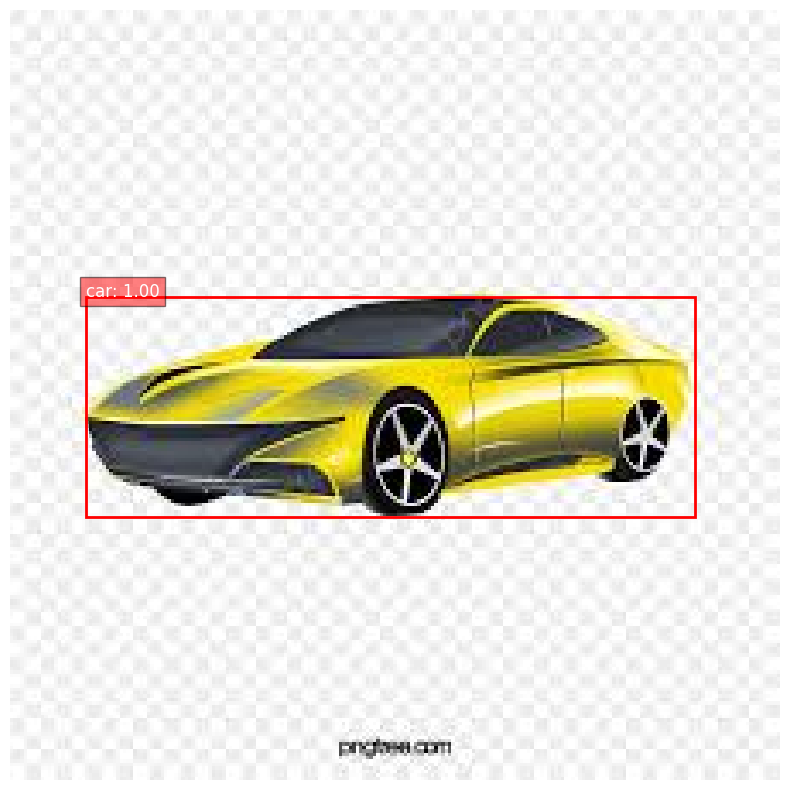

In [13]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T
import requests

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Cargar imagen
image = Image.open("/content/auto.jpg")

# 2. Preparar transformaciones
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img_tensor = transform(image).unsqueeze(0).to(device)

# 3. Pasar por el modelo
# Ensure the model is on the correct device
model.to(device)
outputs = model(img_tensor)

# 4. Aplicar softmax a logits
probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]  # quitar clase "no object"
boxes = outputs['pred_boxes'][0]

# 5. Filtrar predicciones con probabilidad > 0.9
keep = probas.max(-1).values > 0.9
filtered_boxes = boxes[keep]
filtered_scores = probas[keep]
filtered_labels = filtered_scores.argmax(-1)

# 6. Dibujar sobre la imagen original
def rescale_bboxes(bboxes, size):
    img_w, img_h = size
    b = bboxes.clone().cpu()  # <- aquí se asegura que todo esté en CPU
    scale = torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    b = b * scale
    b[:, :2] -= b[:, 2:] / 2
    b[:, 2:] += b[:, :2]
    return b

labels = filtered_labels.cpu().numpy()
scores = filtered_scores.max(-1).values.detach().cpu().numpy()
bboxes = rescale_bboxes(filtered_boxes.detach().cpu(), image.size).numpy()

# 7. Mostrar
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

CLASSES = [
  'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
  'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
  'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
  'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
  'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
  'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
  'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
  'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
  'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

for (xmin, ymin, xmax, ymax), label, score in zip(bboxes, labels, scores):
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                               fill=False, color='red', linewidth=2))
    ax.text(xmin, ymin, f'{CLASSES[label]}: {score:0.2f}',
            fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))
plt.axis('off')
plt.show()

In [25]:
from PIL import Image

# Cargar imagen subida
image = Image.open("example.jpg").convert("RGB")

# Mostrar (opcional en Colab, pero útil para confirmar que se abrió bien)
image.show()

In [26]:
import torch
import torchvision.transforms as T

# Transforma la imagen para el modelo
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img_tensor = transform(image).unsqueeze(0)

# Cargar modelo DETR preentrenado
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval()

# Hacer predicción
with torch.no_grad():
    outputs = model(img_tensor)

# Extraer resultados
probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
keep = probas.max(-1).values > 0.9  # umbral de confianza

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


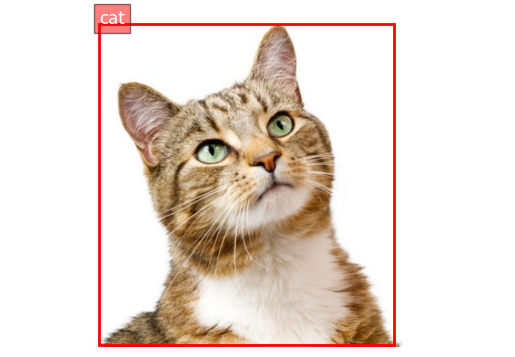

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = out_bbox
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    b = b.cpu().detach().numpy()
    b[..., :2] -= b[..., 2:] / 2
    b[..., 2:] += b[..., :2]
    return b

bboxes = rescale_bboxes(outputs['pred_boxes'][0, keep], image.size)
labels = probas[keep].argmax(-1)

# Visualizar
plt.imshow(image)
ax = plt.gca()
for (xmin, ymin, xmax, ymax), label in zip(bboxes, labels):
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                               fill=False, color='red', linewidth=2))
    ax.text(xmin, ymin, CLASSES[label], fontsize=12, color='white',
            bbox=dict(facecolor='red', alpha=0.5))
plt.axis('off')
plt.show()